In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import pandas as pd

df = pd.read_csv("query_result_2023-04-13T12 16 40.814826Z.csv")
df.info()






<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id_produit                32951 non-null  object 
 1   note_moyenne              32789 non-null  float64
 2   max_photos                32341 non-null  float64
 3   longueur_nom_max          32341 non-null  float64
 4   longueur_description_max  32341 non-null  float64
 5   poids_max                 32949 non-null  float64
 6   nombre_commandes          32951 non-null  int64  
 7   montant_total_ventes      32951 non-null  float64
dtypes: float64(6), int64(1), object(1)
memory usage: 2.0+ MB


In [17]:
df.dropna(inplace=True)

In [18]:
# Split the dataset into features and target variable
X = df[["note_moyenne", "max_photos", "longueur_nom_max", "longueur_description_max", "poids_max", "nombre_commandes"]]
y = df["montant_total_ventes"]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear regression model on the training data
model = LinearRegression()
model.fit(X_train, y_train)

# Get the score of the model on the testing data
score = model.score(X_test, y_test)
print("Model score: {:.2f}".format(score))

Model score: 0.55


In [13]:
df.corr()

/tmp/ipykernel_666405/1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,note_moyenne,max_photos,longueur_nom_max,longueur_description_max,poids_max,nombre_commandes,montant_total_ventes
note_moyenne,1.000000,0.021179,-0.004165,0.026171,-0.041598,0.002008,-0.030952
max_photos,0.021179,1.000000,0.134031,0.108517,0.036740,0.009620,0.007368
longueur_nom_max,-0.004165,0.134031,1.000000,0.098586,0.044347,0.012740,0.009606
longueur_description_max,0.026171,0.108517,0.098586,1.000000,0.062763,0.008145,0.077365
poids_max,-0.041598,0.036740,0.044347,0.062763,1.000000,-0.013950,0.109098
nombre_commandes,0.002008,0.009620,0.012740,0.008145,-0.013950,1.000000,0.717453
montant_total_ventes,-0.030952,0.007368,0.009606,0.077365,0.109098,0.717453,1.000000


In [14]:
import matplotlib.pyplot as plt
import seaborn as sns




/tmp/ipykernel_666405/3715738675.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True,linewidths=0.5)


<AxesSubplot: >

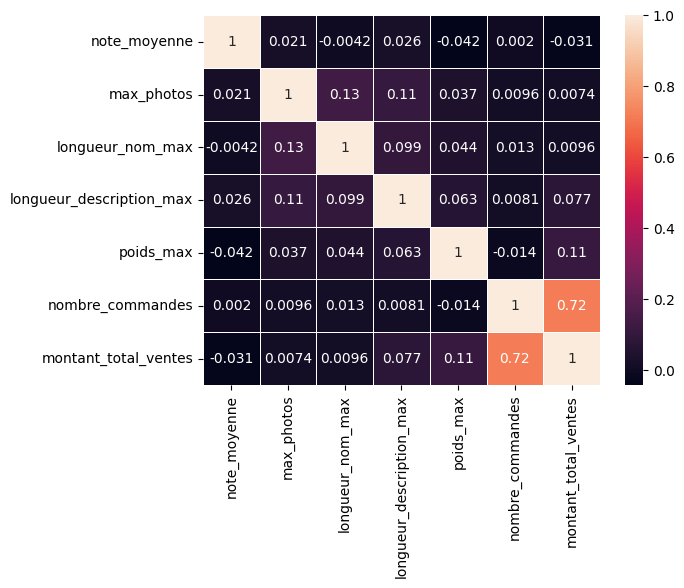

In [15]:
sns.heatmap(df.corr(),annot=True,linewidths=0.5)                             

In [ ]:

#--Est ce que les produits les mieux décrits (taille description, photo) sont le plus susceptibles d‘être achetés?--#


#    Il y a une faible corrélation positive entre max_photos et montant_total_ventes (0.007368)
 #ce qui indique qu'il peut y avoir une légère tendance à ce que les produits avec plus de photos se vendent mieux.


#Il y a une corrélation modérée positive entre nombre_commandes et montant_total_ventes (0.717453),
 #ce qui suggère qu'il y a une forte relation entre le nombre de commandes et le montant total des ventes.

    
#Il y a une corrélation faible négative entre note_moyenne et montant_total_ventes (-0.030952),
 #ce qui peut suggérer que les produits les mieux notés ne sont pas nécessairement les plus vendus.



#Il y a une faible corrélation positive entre poids_max et montant_total_ventes (0.109098),
 #ce qui peut indiquer qu'il y a une légère tendance à ce que les produits les plus lourds se vendent mieux.

#Il n'y a pas de forte corrélation entre les autres variables.


#En conclusion, les résultats de cette analyse de corrélation ne suggèrent pas que les produits les mieux décrits 
 #(taille de la description, photo) sont le plus susceptibles d'être achetés.
 #Cependant, la commande fréquente et le poids élevé des produits semblent être des facteurs importants pour prédire
 #le montant total des ventes.

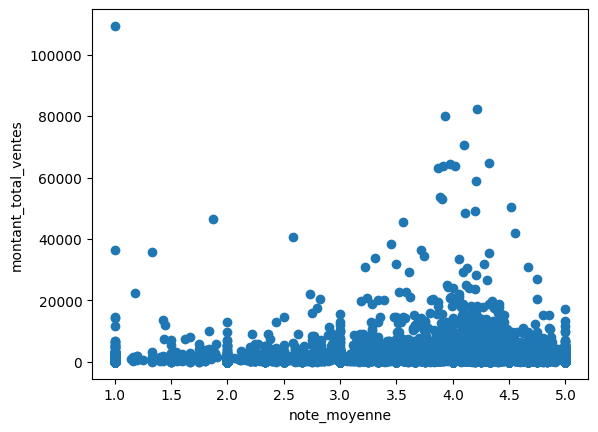

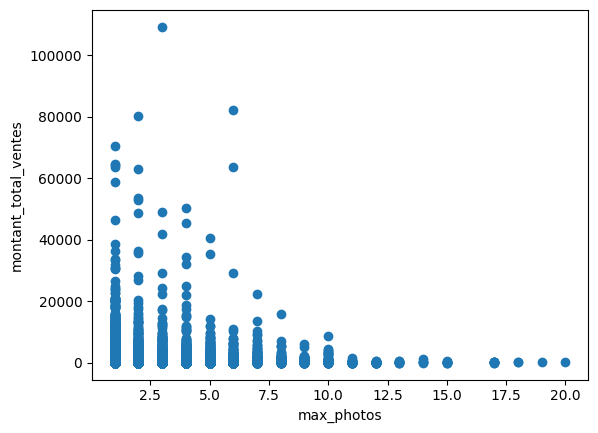

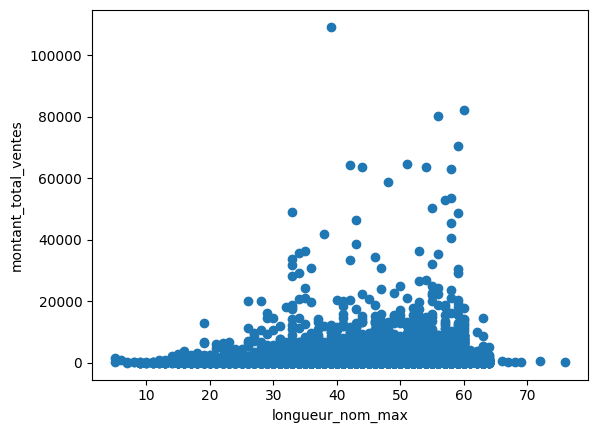

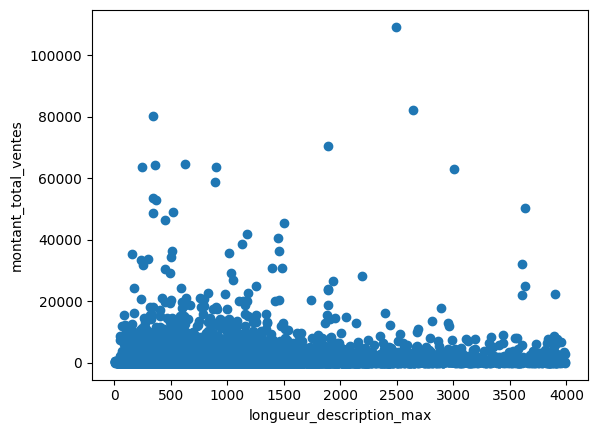

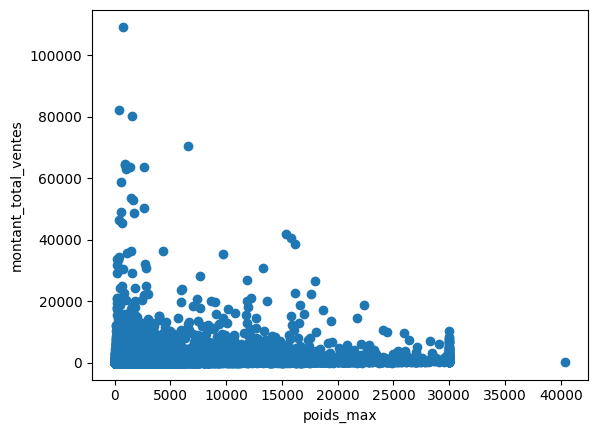

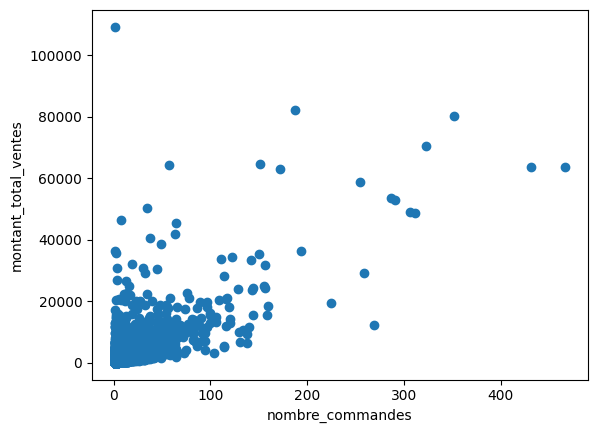

In [20]:
import matplotlib.pyplot as plt

features = ["note_moyenne", "max_photos", "longueur_nom_max", "longueur_description_max", "poids_max", "nombre_commandes"]
target = "montant_total_ventes"

# tracer des graphiques de dispersion pour chaque caractéristique
for feature in features:
    plt.scatter(df[feature], df[target])
    plt.xlabel(feature)
    plt.ylabel(target)
    plt.show()

In [10]:
# Get the coefficients of the linear regression model
coefficients = model.coef_

# Print the coefficients and corresponding feature names
for i in range(len(X.columns)):
    print("{}: {:.2f}".format(X.columns[i], coefficients[i]))

note_moyenne: -53.60
max_photos: -10.61
longueur_nom_max: -1.86
longueur_description_max: 0.25
poids_max: 0.06
nombre_commandes: 160.72


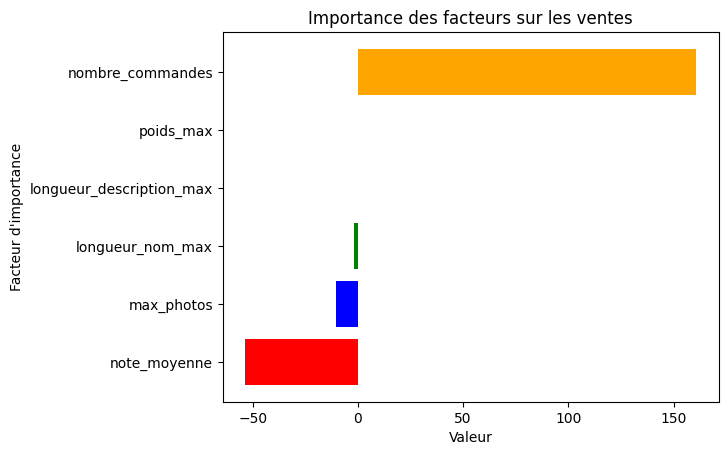

In [3]:
import matplotlib.pyplot as plt

# Définir les variables d'importance et leurs valeurs
variables = ['note_moyenne', 'max_photos', 'longueur_nom_max', 'longueur_description_max', 'poids_max', 'nombre_commandes']
valeurs = [-53.60, -10.61, -1.86, 0.25, 0.06, 160.72]

# Créer le graphique à barres horizontal
fig, ax = plt.subplots()
ax.barh(variables, valeurs, color=['red', 'blue', 'green', 'yellow', 'purple', 'orange'])

# Ajouter un titre et des étiquettes d'axe
ax.set_title("Importance des facteurs sur les ventes")
ax.set_xlabel("Valeur")
ax.set_ylabel("Facteur d'importance")

# Afficher le graphique
plt.show()


In [6]:
#Le score du modèle indique que le modèle est correct à prédire les ventes avec une précision de 55%.
#En ce qui concerne l'importance des caractéristiques:

#la note moyenne et le nombre de commandes ont une forte influence positive sur les ventes,
#ce qui signifie que les produits avec une note élevée et/ou ayant été commandés plusieurs fois sont plus susceptibles d'être achetés.

# le poids maximum n'ont qu'une influence limitée sur les ventes

# les produits ayant une description plus courte et moins de photos ont tendance à être plus populaires auprès des acheteurs